# Spectrum class example
Simple example showing how the spectrum class works. Make sure you install the nasagamma module from: https://github.com/mauricioAyllon/NASA-gamma



In [17]:
%matplotlib inline
from nasagamma import spectrum as sp
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd


Load example data of a calibrated CeBr spectrum.

In [18]:
file = "data/gui_test_data_cebr_calibrated.csv"
df = pd.read_csv(file)

Instantiate a Spectrum object. Note that energy is an optional parameter. If it is not passed, channel numbers are infered.


In [19]:
# instantiate a Spectrum object
spect = sp.Spectrum(counts=df["counts"], energies=df["Energy [keV]"])

Plot using the built-in plotting routine

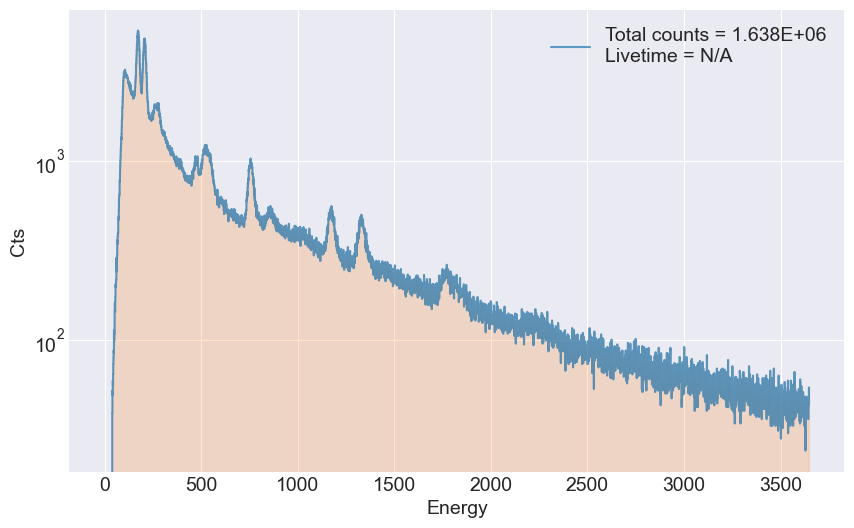

In [20]:
spect.plot()

We can also use some of the methods in the Spectrum class, such as rebin. Note that this conserves the area under the curve.


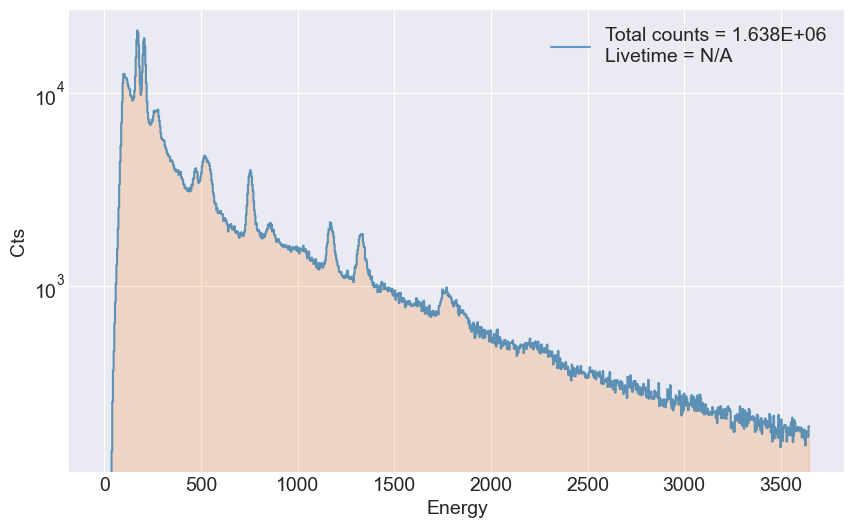

In [21]:
# rebin by 2 
spect.rebin(by=2)
spect.plot()

We can also apply the smooth function, which performs a moving average smoothing of the data. Note that this method does not necessarily conserve the area under the curve.

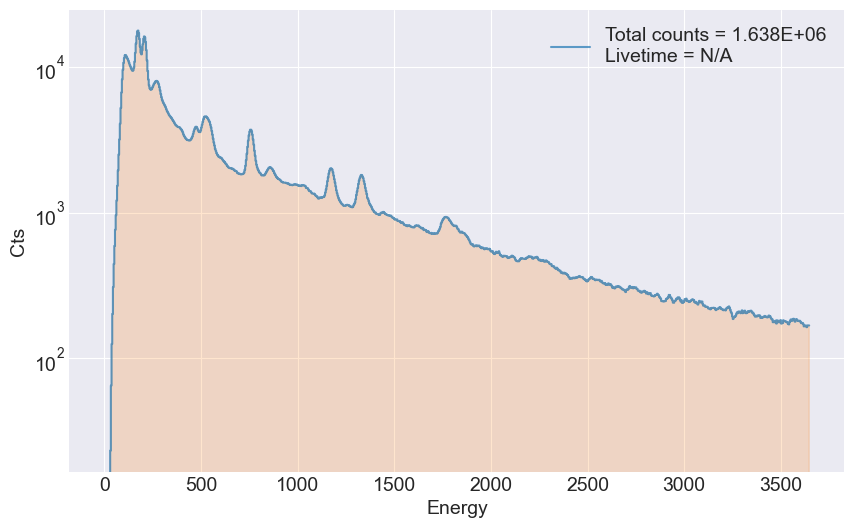

In [22]:
# smoothing every 6 bins
spect.smooth(num=6)
spect.plot()